# Pymaceuticals Inc.
---

### Analysis

- Observation 1: Capomulin and Ramicane have shown greater effectiveness in reducing tumor volume in mice compared to Infunibol and Ceftamin.
- Observation 2: Larger mice (by mass) are more likely to have larger tumors as shown by the high level of correlation between mouse weight and tumor volume. 


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df= pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer")

# Display the data table for preview
study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
gender=study_df["Sex"].value_counts()
gender

Male      958
Female    935
Name: Sex, dtype: int64

In [3]:
# Checking the number of mice.
print(len(study_df["Mouse ID"].unique()))

249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df=study_df[study_df.duplicated()]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseid_g989=study_df.loc[study_df["Mouse ID"]=="g989",:]
mouseid_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_df.drop(study_df[(study_df["Mouse ID"]=="g989")].index,inplace=True)
study_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
# Checking the number of mice in the clean DataFrame.
print(len(study_df["Mouse ID"].unique()))

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_byregimen=study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_byregimen=study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_byregimen=study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standarddeviation_byregimen=study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_byregimen=study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

stats_byregimen=pd.concat({"Mean Tumor Volume":mean_byregimen,"Median Tumor Volume":median_byregimen,"Tumor Volume Variance":\
                           variance_byregimen,"Tumor Volume Std. Dev.":standarddeviation_byregimen,\
                           "Tumor Volume Std. Err.":sem_byregimen},axis=1)
stats_byregimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_stats=study_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median", "std", "var","sem"]})
agg_stats

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

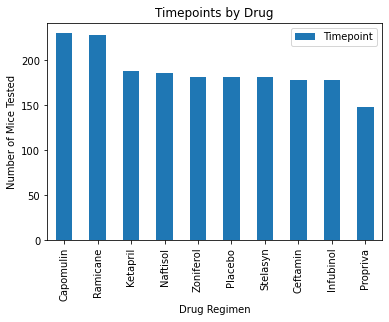

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints=study_df.groupby(["Drug Regimen"])[["Timepoint"]].count()
timepoints=timepoints.sort_values("Timepoint", ascending=False)

time_chart=timepoints.plot.bar(y="Timepoint", rot=90, title="Timepoints by Drug")
time_chart.set_ylabel("Number of Mice Tested")


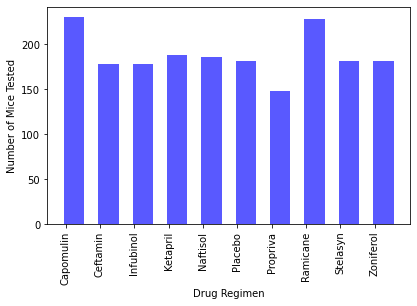

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints=study_df.groupby(["Drug Regimen"])[["Timepoint"]].count()
timepoints=timepoints.reset_index()

plt.figure(figsize=(6.5,4))
x_axis=np.arange(len(timepoints))
tick_locations=[value+0.05 for value in x_axis]
plt.bar(x_axis, timepoints["Timepoint"], color='b', alpha=0.65, align="edge", width=0.6)
plt.xticks(tick_locations, timepoints["Drug Regimen"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Counting occurences of both sexes
study_df["Sex"].value_counts()


Male      958
Female    922
Name: Sex, dtype: int64

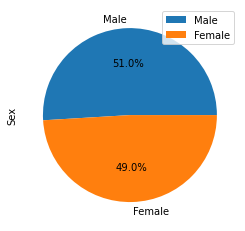

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
dist_bysex=pd.DataFrame({"Sex": [958,922]},index=["Male","Female"])
pie_bysex=dist_bysex.plot.pie(y='Sex',figsize=(4,4), autopct='%0.1f%%')

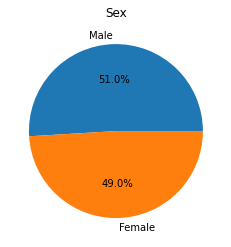

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female = len(study_df[study_df["Sex"] == "Female"])
male = len(study_df[study_df["Sex"] == "Male"])
labels=["Male", "Female"]
sizes=[male, female]
plt.title("Sex")
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
study_df.drop(study_df[(study_df["Drug Regimen"]=="Ketapril")].index,inplace=True)

In [16]:
study_df.drop(study_df[(study_df["Drug Regimen"]=="Naftisol")].index,inplace=True)

In [17]:
study_df.drop(study_df[(study_df["Drug Regimen"]=="Placebo")].index,inplace=True)

In [18]:
study_df.drop(study_df[(study_df["Drug Regimen"]=="Propriva")].index,inplace=True)

In [19]:
study_df.drop(study_df[(study_df["Drug Regimen"]=="Stelasyn")].index,inplace=True)

In [20]:
study_df.drop(study_df[(study_df["Drug Regimen"]=="Zoniferol")].index,inplace=True)

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Creating a separate dataframe for each drug 

Ramicane_treatment=study_df.loc[study_df["Drug Regimen"]=="Ramicane",:]
Capomulin_treatment=study_df.loc[study_df["Drug Regimen"]=="Capomulin",:]
Infubinol_treatment=study_df.loc[study_df["Drug Regimen"]=="Infubinol",:]
Ceftamin_treatment=study_df.loc[study_df["Drug Regimen"]=="Ceftamin",:]

#displaying one df to make sure it contains the correct info
Ramicane_treatment






,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
450,y449,Ramicane,Male,19,24,0,45.000000,0
451,y449,Ramicane,Male,19,24,5,45.877545,0
452,y449,Ramicane,Male,19,24,10,46.378092,0


In [22]:
# Start by getting the last (greatest) timepoint for each mouse
#Grouping data by Mouse ID and isolating the max value for timepoint
Ramicane_last_timepoint=Ramicane_treatment.groupby(["Mouse ID"])[["Timepoint"]].max()
Capomulin_last_timepoint=Capomulin_treatment.groupby(["Mouse ID"])[["Timepoint"]].max()
Infubinol_last_timepoint=Infubinol_treatment.groupby(["Mouse ID"])[["Timepoint"]].max()
Ceftamin_last_timepoint=Ceftamin_treatment.groupby(["Mouse ID"])[["Timepoint"]].max()

#displaying one dataframe to make sure it captured the correct info
Ceftamin_last_timepoint


,Timepoint
Mouse ID,
a275,45
b447,0
b487,25
b759,30
f436,15
h531,5
j296,45
k210,45
l471,45


In [23]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint



Ramicane_group=pd.merge(Ramicane_last_timepoint,study_df,on=["Mouse ID", "Timepoint"])
Capomulin_group=pd.merge(Capomulin_last_timepoint,study_df,on=["Mouse ID", "Timepoint"])
Infubinol_group=pd.merge(Infubinol_last_timepoint,study_df,on=["Mouse ID", "Timepoint"])
Ceftamin_group=pd.merge(Ceftamin_last_timepoint,study_df,on=["Mouse ID", "Timepoint"])


Ramicane_group

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [24]:
# Create empty list to fill with tumor vol data (for plotting)
ramicane_tumor_volume=[]
ceftamin_tumor_volume=[]
infubinol_tumor_volume=[]
capomulin_tumor_volume=[]

#for loops to fill each list with tumor volume

for value in Ramicane_group["Tumor Volume (mm3)"]:
    ramicane_tumor_volume.append(value)
for value in Capomulin_group["Tumor Volume (mm3)"]:
    capomulin_tumor_volume.append(value)
for value in Infubinol_group["Tumor Volume (mm3)"]:
    infubinol_tumor_volume.append(value)
for value in Ceftamin_group["Tumor Volume (mm3)"]:
    ceftamin_tumor_volume.append(value)

#sorting lists to get data in ascending order and make it easier to find potential outliers  
ramicane_tumor_volume.sort()
ceftamin_tumor_volume.sort()
infubinol_tumor_volume.sort()
capomulin_tumor_volume.sort()   

print(f'Ramicane group: {ramicane_tumor_volume}')
print(f'Capomulin group:{capomulin_tumor_volume}')
print(f'Infubinol group:{infubinol_tumor_volume}')
print(f'Ceftamin group:{ceftamin_tumor_volume}')

    

Ramicane group: [22.05012627, 29.12847181, 30.27623175, 30.56462509, 30.63869575, 31.09533505, 31.56046955, 32.97852192, 33.39765251, 33.56240217, 36.13485243, 36.37451039, 36.56165229, 37.22565033, 37.31123552, 38.34200823, 38.4076183, 38.81036633, 40.65900627, 40.66771292, 43.0475426, 43.16637266, 43.41938077, 44.18345092, 45.22086888]
Capomulin group:[23.34359787, 28.43096411, 28.48403281, 30.48598484, 31.02392294, 31.8962384, 32.37735684, 33.32909778, 34.45529799, 36.04104736, 37.07402422, 37.31184577, 38.1251644, 38.75326548, 38.84687569, 38.93963263, 38.98287774, 39.95234669, 40.1592203, 40.65812366, 40.72857787, 41.48300765, 41.58152074, 46.53920617, 47.68596303]
Infubinol group:[36.3213458, 45.69933088, 46.25011212, 47.01036401, 50.00513807, 51.54243058, 54.04860769, 54.65654872, 55.62942846, 55.65068132, 57.03186187, 58.26844248, 60.16518046, 60.91876652, 60.96971133, 62.11727887, 62.43540402, 62.75445141, 65.52574285, 66.08306589, 66.19691151, 67.28962147, 67.68556862, 67.973

In [25]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#creating dataframe out of previous list for Ramicane group
ramicane_tumor_df=Ramicane_group["Tumor Volume (mm3)"]

#calculating quartiles
ramicane_quartiles=ramicane_tumor_df.quantile([.25,.5,.75])

lowerq=ramicane_quartiles[.25]
upperq=ramicane_quartiles[.75]
iqr=upperq-lowerq
lower_bound=lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f'There are no outliers in the Ramicane group')

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
There are no outliers in the Ramicane group


In [26]:
#creating dataframe out of previous list for Infubinol group
infubinol_tumor_df=Infubinol_group["Tumor Volume (mm3)"]

#calculating quartiles
infubinol_quartiles=infubinol_tumor_df.quantile([0.25,0.5,0.75])

lowerq=infubinol_quartiles[0.25]
upperq=infubinol_quartiles[0.75]
iqr=upperq-lowerq
lower_bound=lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f'There is *1* outlier in the Infunibol group with a value of 36.3213458')



Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
There is *1* outlier in the Infunibol group with a value of 36.3213458


In [27]:
#creating dataframe out of previous list for Infubinol group
capomulin_tumor_df=Capomulin_group["Tumor Volume (mm3)"]

#calculating quartiles
capomulin_quartiles=capomulin_tumor_df.quantile([.25,.5,.75])

lowerq=capomulin_quartiles[0.25]
upperq=capomulin_quartiles[0.75]
iqr=upperq-lowerq
lower_bound=lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f'There are no outliers in the Capomulin group')

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There are no outliers in the Capomulin group


In [28]:
#creating dataframe out of previous list for Infubinol group
ceftamin_tumor_df=Ceftamin_group["Tumor Volume (mm3)"]

#calculating quartiles
ceftamin_quartiles=ceftamin_tumor_df.quantile([.25,.5,.75])

lowerq=ceftamin_quartiles[0.25]
upperq=ceftamin_quartiles[0.75]
iqr=upperq-lowerq
lower_bound=lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f'There are no outliers in the Ceftamin group')


Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
There are no outliers in the Ceftamin group


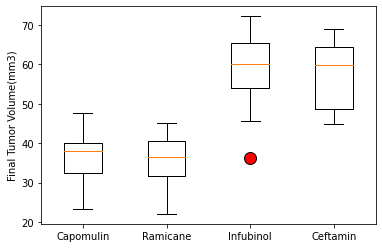

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#Using previous lists and combining them

data=[capomulin_tumor_volume,ramicane_tumor_volume,infubinol_tumor_volume,ceftamin_tumor_volume]
fig1,ax1=plt.subplots()
ax1.set_ylabel("Final Tumor Volume(mm3)")
ax1.boxplot(data,flierprops={'marker':'o',"markersize":12,'markerfacecolor':'red'})
plt.xticks([1,2,3,4],['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.show()

## Line and Scatter Plots

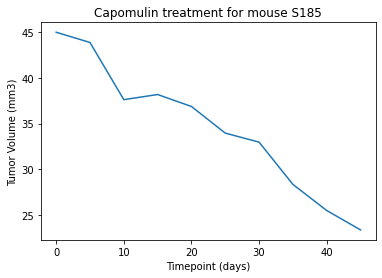

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Using previous df containing mice treated with Capomulin and isolating a single mouse

mouse_s185=Capomulin_treatment.loc[Capomulin_treatment["Mouse ID"]=="s185",:]


x_axis=mouse_s185["Timepoint"]
y_axis=mouse_s185["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)
plt.title("Capomulin treatment for mouse S185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

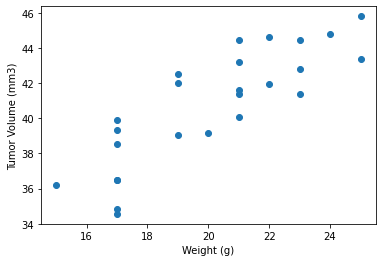

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Using previous df containing mice treated with Capomulin and grouping by Mouse ID while calculating mean
average_tumor=Capomulin_treatment.groupby(['Mouse ID',"Weight (g)"])[['Tumor Volume (mm3)']].mean().reset_index()


x_axis_data=average_tumor['Weight (g)']
y_axis_data=average_tumor['Tumor Volume (mm3)']
plt.scatter(x_axis_data,y_axis_data)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

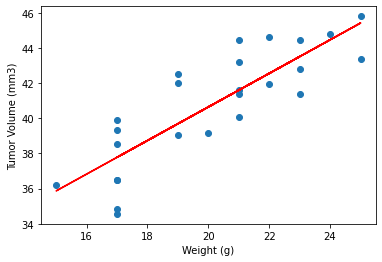

The correlation between mouse weight and the average tumor volume is 0.84


In [32]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen
import scipy.stats as st
from scipy.stats import linregress
x_axis_data=average_tumor['Weight (g)']
y_axis_data=average_tumor['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data, y_axis_data)
regress_values = x_axis_data * slope + intercept

plt.plot(x_axis_data,regress_values,"r-")

plt.scatter(x_axis_data,y_axis_data)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
correlation=st.pearsonr(x_axis_data,y_axis_data)
plt.show()
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')